# Intro to data visualization

``Hello world, data visualization!``

__main reference:__ https://github.com/StephenElston/ExploringDataWithPython/blob/master/PlottingWithPytonTools/LearningDataVisualization.ipynb  
__siraj video:__ https://www.youtube.com/watch?v=WWKxzjKzN3A

### Datasets:

_Heart Disease UCI:_ https://www.kaggle.com/ronitf/heart-disease-uci  
_House Sales in King Country, USA:_ https://www.kaggle.com/harlfoxem/housesalesprediction  

### Dependências:
Caso não tenha seaborn utilizar o comando `` pip install seaborn ``.

### Introdução:
Será abordado alguns tipos de visualização de dados utilizado as bibliotecas _pandas_, _matplotlib_ e _seaborn_. Dos datasets apresentados, um apresenta classes como atributo alvo, enquanto no outro o atributo alvo são valores contínuos (regressão).
Irei apresentar algumas das formas que eu utilizo para representar os dados, algumas delas foram retiradas da referência apresentada acima, outras eu utilizo da forma que me é desejado em alguma determinada situação, então pode não ser da maneira mais correta de análisar, até porque estou aprendendo :)
Das representações que buscarei demostrar serão elas: visualização de atributos isolados, visualição de relacionamento/correlação (todas no plano 2D), visualiazação de atributos catégoricos e visualização de atributos contínuos, buscando sempre entender que tipo de informação cada representação nos dá. 

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load heart disease dataset

In [2]:
df_heart = pd.read_csv("dataset/heart.csv")

In [3]:
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Nesse dasaset a maioria dos dados são catégoricos, então a representação visual dos dados se limitam um pouco. O atributo alvo é o 'target' que tem como valores 1(com a doença) e 2(sem a doença). O nosso objetivo é tentar extrair informações com relação aos demais atributos com relação ao atributo alvo.

## Dados Univariados

### Line plot

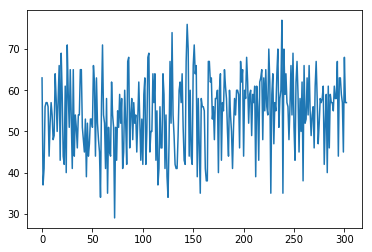

In [4]:
plt.plot(df_heart['age'])

Line plot para esse tipo de variável não é muito interessante, pois não trás muito informação. Basicamente o line plot pode ser usado para análisar dados feitos em série, em que duas váriaveis podem aprensentar suas relações. Um bom exemplo são váriaveis que variam com o tempo.

### Bar plot

Bar plots são bem utilizados em contagem de váriaveis, pois é fácil de observar e interpretar a recorrência de cada valor através de um gráfico com barras.

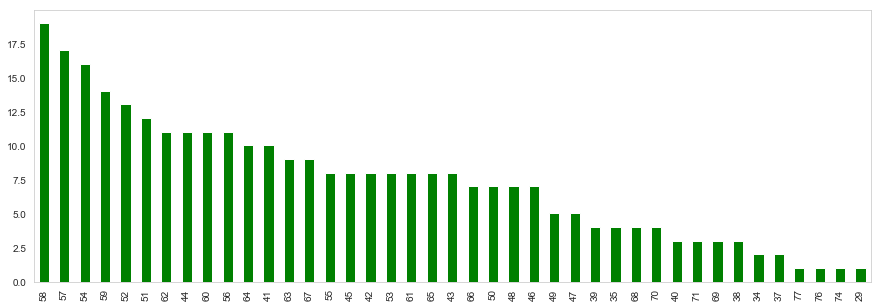

In [42]:
fig, ax = plt.subplots(1,1, figsize=(15, 5))

counts = df_heart['age'].value_counts()
counts.plot.bar(color='green', ax=ax, grid=False)

Nesse exemplo foi plotado um bar plot da idade de todos as instâncias do dataset, é fácil observar que a maior recorrência de idade é aos 58, com aproximadamente 19 repetições, seguido da idade de 57 anos e 54 anos, e assim por diante.

### Histograma

Os histogramas são muito parecidos com os bar plots, ele divide os dados em uma quantidade n de seguimentos, chamados de bins,
e para cada seguimento é apresentado sua recorrência. Com o histograma conseguimos observar, com melhor qualidade, como os dados estão distribuidos.

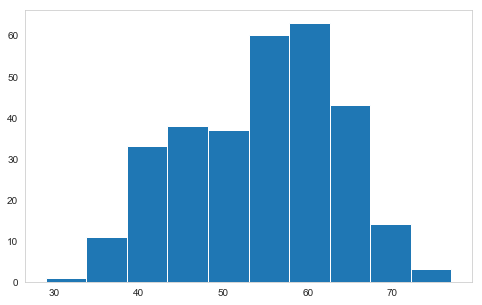

In [41]:
fig, ax = plt.subplots(1,1, figsize=(8, 5))
df_heart['age'].hist(ax=ax, grid=False)

Nesse caso, o histograma está com relação as idades nas instâncias do dataset, podemos observar que as maiores recorrência no dataset estão nas pessoas que tem entre, aproximadamente, 54 à 63 anos de idade. 

### Kernel density plot

Kerner density plot tem a mesma ideia que histograma, mas ele trás uma visualização mais suave e com os detalhes abstraidos.

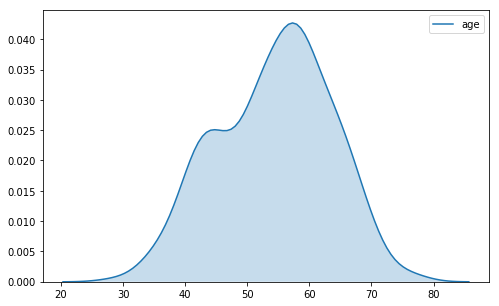

In [7]:
fig, ax = plt.subplots(1,1, figsize=(8, 5))
sns.kdeplot(df_heart['age'], shade=True, ax=ax)

Da mesma forma que o histograma, entre 54 e 63 anos de idade, aproximadamente.

### Box plot

Box plots são bem interessantes, eles nos apresentam bastante informação sobre a variável.
A linha do meio representa a mediana (segundo quartil - Q2), a parte de baixo do retângulo é o primeiro quartil (Q1) e a parte de cima o terceiro quartil (Q3). Os limites superiores e inferiores são os 3/2 a mais e 3/2 a menos, respectivamente, do interquartil range (IQR), sendo IQR = Q3 - Q1.  
Eles são muito bons, como pode observar, de representa localização de dados e por conta disso eles nos ajudam a identificar, em muitos casos, os outiliers presentes em um dataset.

{'whiskers': [<matplotlib.lines.Line2D at 0xd2d5c30>,
 'caps': [<matplotlib.lines.Line2D at 0xd2d5f50>,
 'boxes': [<matplotlib.lines.Line2D at 0xd2d59b0>],
 'medians': [<matplotlib.lines.Line2D at 0xd2e05f0>],
 'fliers': [<matplotlib.lines.Line2D at 0xd2e0630>],
 'means': []}

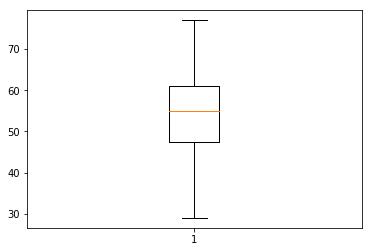

In [8]:
plt.boxplot(df_heart['age'])

Nesse boxplot está representado as idades das instâncias presentes no dataset.  
A mediana é em aproximadamente 55 anos de idade, o Q1 e o Q2 é, respectivamente, aproximadamente 48 e 62. E como não aparece objetos em cima dos limites superiores e inferiores, provavelmente não tem outliers para esse contexto.

## Dados Multivariados

Dados multivariados, ou seja, dois ou mais váriaveis irão ser plotadas para ter uma análise mais apurada sobre a relação/correlação das variáveis

### Scatter plot

Scatter plot é o exemplo mais comum que se utiliza para tratar relacionamentos entre duas (ou mais) variáveis no plano cartesiano, em que cada instância é representada por uma figura na qual é chamada de objeto.

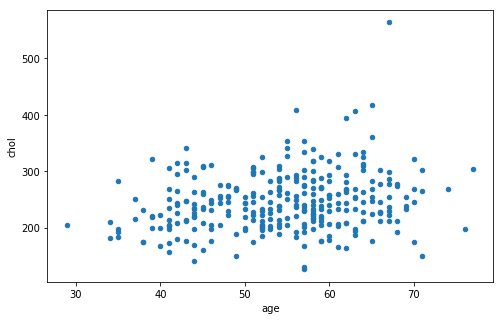

In [9]:
fig, ax = plt.subplots(1,1, figsize=(8, 5))
df_heart.plot(kind='scatter', x='age', y='chol', ax=ax)

Scatter plot entre a variável 'age' (idade) e 'chol' (serum cholesterol mg/dl)

In [10]:
# instances with disease dataframe
withd = df_heart[df_heart['target']==1]

# instances without disease dataframe
withoutd = df_heart[df_heart['target']==0]

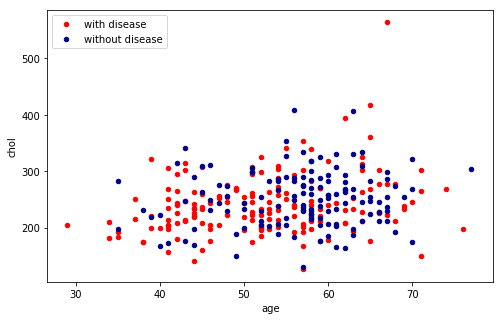

In [11]:
fig, ax = plt.subplots(1,1, figsize=(8, 5))

withd.plot(kind='scatter', x='age', y='chol', ax=ax, color='Red', label='with disease')
withoutd.plot(kind='scatter', x='age', y='chol', ax=ax, color='DarkBlue', label='without disease')
plt.legend()

Aqui está representada as mesmas variáveis do scatter plot anterior, porém com uma variável a mais, o 'target' que representa se esse objeto tem a doença cardiaca ou não. Sendo um exemplo de representação de mais de duas variáveis em plano 2D.

#### Transparência
Acrescentar uma transparência para poder observar sobreposição

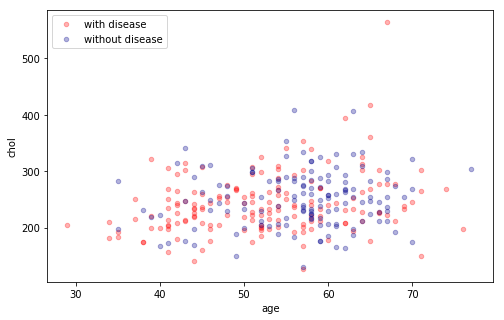

In [12]:
fig, ax = plt.subplots(1,1, figsize=(8, 5))

withd.plot(kind='scatter', x='age', y='chol', ax=ax, color='Red', label='with disease', alpha=0.3)
withoutd.plot(kind='scatter', x='age', y='chol', ax=ax, color='DarkBlue', label='without disease', alpha=0.3)
plt.legend()

#### Redimensionar
Redimensionar um objeto conforme outra váriavel é uma forma de representar mais uma variável no plano 2D. Apresentando no total 4 variáveis.

Text(0, 0.5, 'Serum Cholesterol (mg/dl)')

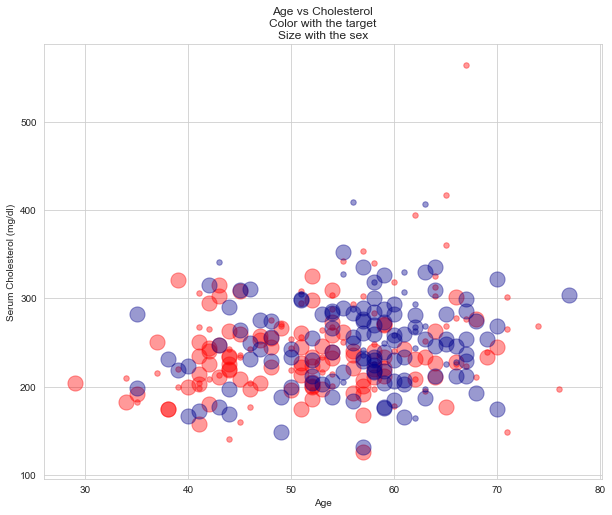

In [32]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
colors = ['DarkBlue', 'Red']

for index, value in enumerate(df_heart['sex']):
    ax.scatter(x=df_heart['age'][index], y=df_heart['chol'][index],
               color=colors[df_heart['target'][index]], s=30+(value*200), alpha=0.4)

ax.set_title("Age vs Cholesterol\nColor with the target\nSize with the sex")    
ax.set_xlabel("Age")
ax.set_ylabel("Serum Cholesterol (mg/dl)")

### Violin Plot

Violin plot é muito parecido ao box plot, só que ele agrega densidade nas partes em que um dado valor é mais recorrente.

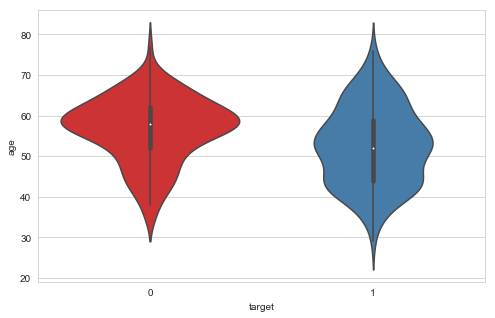

In [23]:
fig, ax = plt.subplots(1,1, figsize=(8, 5))
sns.set_style("whitegrid")
sns.violinplot(data=df_heart, y='age', x='target', palette='Set1', ax=ax)

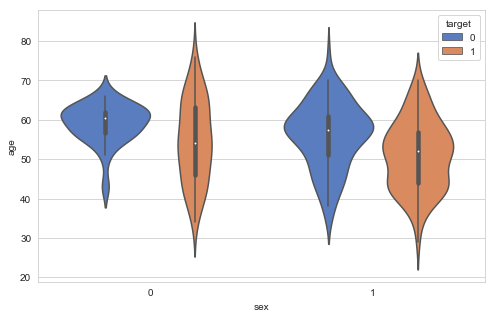

In [29]:
fig, ax = plt.subplots(1,1, figsize=(8, 5))
sns.set_style("whitegrid")
sns.violinplot(data=df_heart, y='age', x='sex', hue='target', palette='muted', ax=ax)

### Count Plot

Count plot é um tipo de bar plot que pode representar com melhor visualização o relacionamento de uma ou mais váriaveis em uma só visualização.

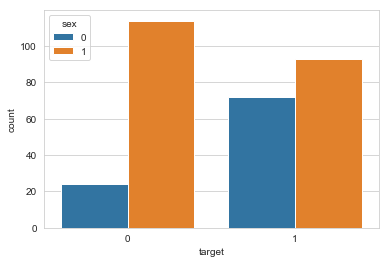

In [15]:
sns.countplot(data=df_heart, x='target', hue='sex')

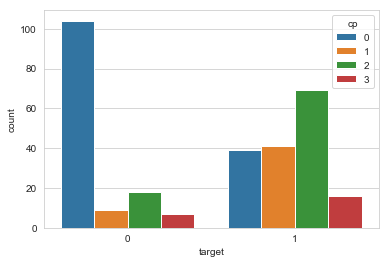

In [16]:
sns.countplot(data=df_heart, x='target', hue='cp')

### Conteúdo Extra

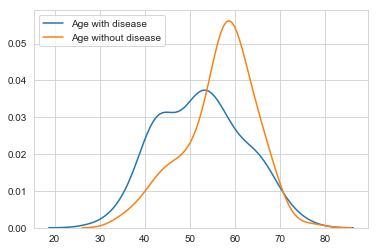

In [34]:
sns.kdeplot(withd['age'], label="Age with disease")
sns.kdeplot(withoutd['age'], label="Age without disease")

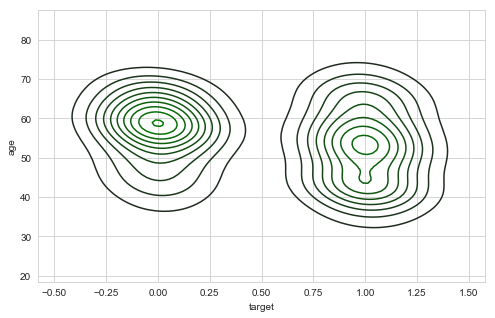

In [54]:
fig, ax = plt.subplots(1,1, figsize=(8, 5))
sns.kdeplot(df_heart['target'], df_heart['age'], color="Green", ax=ax)

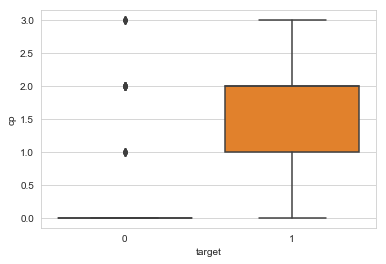

In [17]:
sns.boxplot(data=df_heart, x='target', y='cp')

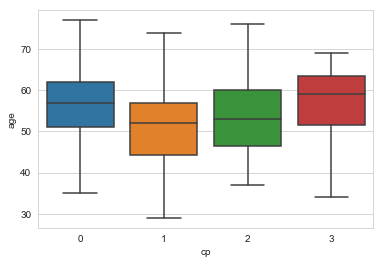

In [18]:
sns.boxplot(data=df_heart, x='cp', y='age')

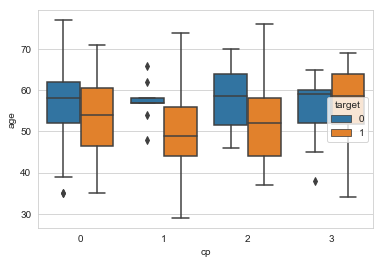

In [36]:
sns.boxplot(data=df_heart, x='cp', y='age', hue='target')

Da para apresentar qual a idade aproximada das pessoas que tem um nível de dor no peito e se tem a doença ou não (mostrando que o 'y' normalmente é o alvo de informação que a gente tá buscando)

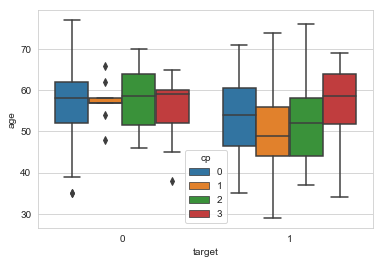

In [37]:
sns.boxplot(data=df_heart, x='target', y='age', hue='cp')